### 버전

In [1]:
%load_ext watermark
%watermark -v -p numpy,scipy,sklearn,pandas,matplotlib

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

numpy     : 1.20.3
scipy     : 1.7.1
sklearn   : 0.0.post5
pandas    : 1.3.4
matplotlib: 3.4.3



# 설정

In [2]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# SciPy 이슈 #5998에 해당하는 경고를 무시합니다(https://github.com/scipy/scipy/issues/5998).
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [6]:
matplotlib.matplotlib_fname()

'D:\\Users\\mangg\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [7]:
matplotlib.get_cachedir()

'C:\\Users\\mangg\\.matplotlib'

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [4]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [5]:
import matplotlib

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import sklearn.linear_model

In [6]:
# 데이터 적재
oecd_bli = pd.read_csv(datapath + 'oecd_bli_2015.csv', thousands=',')

gdp_per_capita = pd.read_csv(datapath + 'gdp_per_capita.csv', thousands=',',
                            delimiter = '\t', encoding='latin1', na_values='n/a')

In [7]:
# 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

X = np.c_[country_stats["GDP per capita"]]

y = np.c_[country_stats['Life satisfaction']]

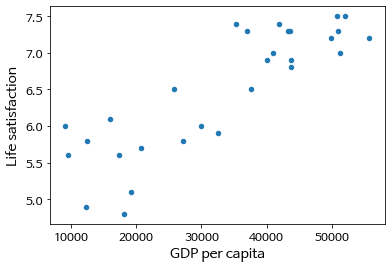

In [8]:
#데이터 시각화
country_stats.plot(kind='scatter', x='GDP per capita', y = 'Life satisfaction')

plt.show()

In [9]:
#선형 모델 선택
model = sklearn.linear_model.LinearRegression()

In [10]:
# 모델 훈련
model.fit(X,y)

LinearRegression()

In [11]:
# 키프로스에 대한 예측
X_new = [[22587]] # 키프로스 1인당 GDP
print(model.predict(X_new)) # 결과

[[5.96242338]]


# 삶의 만족도 데이터 적재와 준비

In [13]:
# 주소위치에서 파일을 불러옴/ 천단위로 ',' 단위구분
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')

# oecd_bli의 속성'INEQUALTY'이 'TOT'인 값만 골라내어 저장.
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]

# pivot 행데이터를 열데이터로 회전시켜줌/ 행 : 나라, 열 : 척도, 값 : 값
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [14]:
# 삶의 만족도 열머리
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

# 1인당 GDP 데이터 적재와 준비

In [15]:
# 구분자 \t, 인코딩 'latin1', na값 = n/a
gdp_per_capita = pd.read_csv(datapath+'gdp_per_capita.csv', thousands=',',
                            delimiter='\t', encoding='latin1', na_values="n/a")

# inplace=True 메모리를 copy하지 않고 원본 메모리에 그대로 적용
# 열(2015)의 이름을 GDP per capita로 바꿈
gdp_per_capita.rename(columns={'2015':'GDP per capita'}, inplace=True)

# Country를 색인으로 설정
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [16]:
# 병합
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)

# GDP per capita가 오름차순으로 정렬
full_country_stats.sort_values(by="GDP per capita", inplace=True)


full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [17]:
# 미국의 인당 GDP와 삶의 만족도
full_country_stats[["GDP per capita", 'Life satisfaction']].loc['United States']

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [18]:
# 삭제 지수, 유지 지수
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[remove_indices]

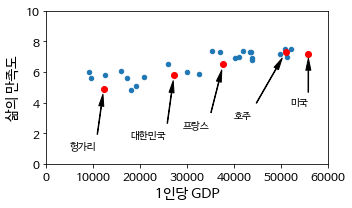

In [19]:
# 그래프 종류 : 산점도, 가로축 : 인당 GDP, 세로축 : 삶의 만족도, 그래프 사이즈 5:3
ax = sample_data.plot(kind='scatter', x='GDP per capita', y = 'Life satisfaction',
                     figsize=(5,3))
ax.set(xlabel='1인당 GDP', ylabel='삶의 만족도')

#가로축 0~60000, 세로축 0~10
plt.axis([0, 60000, 0, 10])

# 표시 텍스트와 위치
position_text = {
    "Hungary" : (5000, 1, '헝가리'),
    'Korea' : (18000, 1.7, '대한민국'),
    'France' : (29000, 2.4, '프랑스'),
    'Australia' : (40000, 3, '호주'),
    'United States' : (52000, 3.8, '미국')
}

for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    # country가 'United States'이면 U.S. 아니면 country 그대로
    country = 'U.S.' if country == 'United States' else country
    # 주석달기(text, xy=(위치인데 여기선 의미없음), xytext = 좌표설정)
    # 주석달기(화살표, 글씨)
    plt.annotate(pos_text[2], xy=(pos_data_x, pos_data_y), xytext=pos_text[:2],
                arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    # 빨간점
    plt.plot(pos_data_x, pos_data_y, 'ro')

#그림 저장 함수 위에 있음
save_fig('money_happy_scatterplot')
plt.show()

In [20]:
#csv파일로 저장
sample_data.to_csv(os.path.join("datasets",'lifesat','lifesat.csv'))

In [21]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


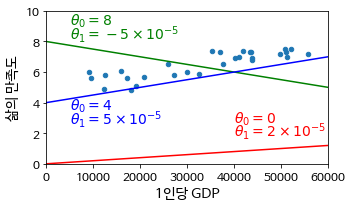

In [22]:
ax = sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction',figsize=(5,3))
ax.set(xlabel='1인당 GDP', ylabel='삶의 만족도')
plt.axis([0,60000, 0,10])
#1차원 배열 만들기/ 선형 간격
X=np.linspace(0,60000,1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color='r')
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color='r')

plt.plot(X, 8-5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color='g')
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color='g')

plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color='b')
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color='b')

save_fig('tweaking_model_params_plot')
plt.show()

# 선형 모델

In [23]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
#열로 합체
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
# 절편, 기울기
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.853052800266435, 4.911544589158485e-05)

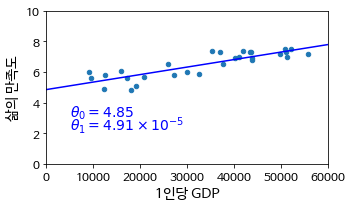

In [24]:
ax = sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
ax.set(xlabel='1인당 GDP', ylabel='삶의 만족도')
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)

plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color='b')
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color='b')

save_fig('best_fit_model_plot')
plt.show()

# 키프로스 국가 삶의 만족도 예측

In [25]:
# 키프로스 인당 GDP
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]['GDP per capita']

print(cyprus_gdp_per_capita)

# 키프로스 인당 GDP로 삶의 만족도 예측 (선형회귀)
cyprus_predicted_life_satisfaction = lin1.predict(cyprus_gdp_per_capita.reshape(-1,1))[0][0]

cyprus_predicted_life_satisfaction

22587.49


5.962447443188149

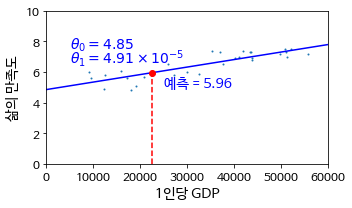

In [26]:
# s = 점 사이즈
ax = sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5,3), s=1)
ax.set(xlabel='1인당 GDP', ylabel='삶의 만족도')
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, 'b')
plt.axis([0,60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color='b')
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color='b')

# 가로[시작점, 끝점], 세로[시작점, 끝점]
plt.plot([cyprus_gdp_per_capita,cyprus_gdp_per_capita], [0,cyprus_predicted_life_satisfaction], 'r--')
plt.text(25000, 5.0, r"예측 = 5.96", fontsize=14, color='b')
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction,'ro')
save_fig('cyprus_prediction_plot')
plt.show()

# 데표성 없는 훈련 데이터

In [27]:
sample_data[7:10]

,GDP per capita,Life satisfaction
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


In [28]:
(5.1+5.7+6.5)/3

5.766666666666667

In [29]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [30]:
position_text2 = {
    'Brazil' : (1000, 9, '브라질'),
    'Mexico' : (11000, 9, '멕시코'),
    'Chile':(25000, 9, '칠레'),
    'Czech Republic':(35000, 9, '체코'),
    'Norway':(60000, 3, '노르웨이'),
    'Switzerland':(72000, 3, '스위스'),
    'Luxembourg':(90000, 3, '룩셈부르크')
}

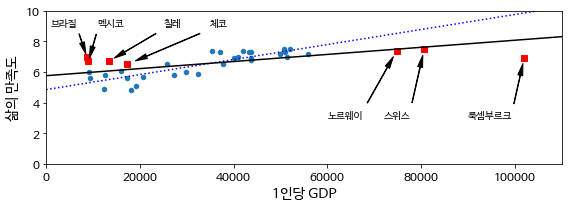

In [31]:
ax=sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(8,3))
ax.set(xlabel='1인당 GDP', ylabel='삶의 만족도')
plt.axis([0,110000, 0,10])

#기존 데이터 선형모델
X=np.linspace(0,110000, 1000)
plt.plot(X, t0+t1*X, 'b:')

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(pos_text[2], xy=(pos_data_x, pos_data_y), xytext=pos_text[:2],
                arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y,'rs')

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats['GDP per capita']]
yfull = np.c_[full_country_stats['Life satisfaction']]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0,110000,1000)
plt.plot(X, t0full + t1full*X, 'k')

save_fig('representative_training_data_scatterplot')
plt.show()

# 과대적합

D:\Users\mangg\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
D:\Users\mangg\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


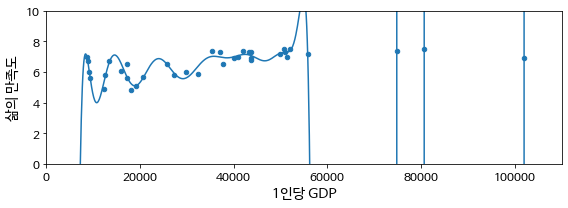

In [32]:
ax = full_country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(8,3))
ax.set(xlabel='1인당 GDP', ylabel='삶의 만족도')
plt.axis([0,110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

# 전처리.다항회귀(차수, 0차항(1)을 만드냐?)
poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
#평균0, 분산1 로 조정, 정규화
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly',poly), ('scal',scaler), ('lin',lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
#np.newaxis = 차원확장, None랑 같음
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)

save_fig('overfitting_model_plot')
plt.show()

# 리지를 사용해 규제한 선형 모델

In [33]:
full_country_stats.loc[[c for c in full_country_stats.index if 'W' in c.upper()]]['Life satisfaction']

Country
New Zealand    7.3
Sweden         7.2
Norway         7.4
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [34]:
gdp_per_capita.loc[[c for c in gdp_per_capita.index if 'W' in c.upper()]].head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Botswana,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6040.957,2008.0
Kuwait,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",29363.027,2014.0
Malawi,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",354.275,2011.0
New Zealand,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37044.891,2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0


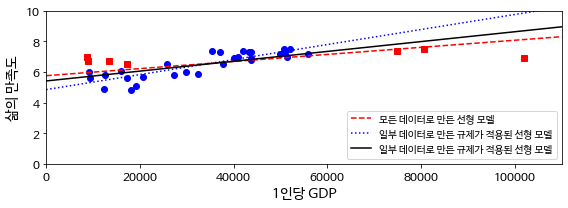

In [35]:
plt.figure(figsize=(8,3))

plt.xlabel('1인당 GDP')
plt.ylabel('삶의 만족도')

plt.plot(list(sample_data['GDP per capita']), list(sample_data['Life satisfaction']),'bo')
plt.plot(list(missing_data['GDP per capita']), list(missing_data['Life satisfaction']),'rs')

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full+ t1full *X, 'r--', label='모든 데이터로 만든 선형 모델')
plt.plot(X, t0+ t1*X, 'b:', label='일부 데이터로 만든 규제가 적용된 선형 모델')

#선형 모델 보완
ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data['GDP per capita']]
ysample = np.c_[sample_data['Life satisfaction']]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge*X, 'k' , label = '일부 데이터로 만든 규제가 적용된 선형 모델')

#라벨
plt.legend(loc='lower right')
plt.axis([0,110000, 0, 10])
save_fig('ridge_model_plot')
plt.show()